In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv("/content/drive/MyDrive/CSC590_Project/data/2020/heart_2020_cleaned.csv")
df2 = pd.read_csv("/content/drive/MyDrive/CSC590_Project/data/2022/heart_2022_no_nans.csv")

In [6]:
# Merge the datasets
merged_heart_data = pd.concat([df1, df2], axis=0, ignore_index=True)

filtered_data = merged_heart_data[['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
                    'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
                    'AgeCategory', 'PhysicalActivity', 'GenHealth', 'SleepTime']]

In [7]:
encoded_data = pd.get_dummies(filtered_data, drop_first=True)

In [8]:
X = encoded_data.drop(columns=['HeartDisease_Yes'])
y = encoded_data['HeartDisease_Yes']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Make Predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [13]:
# Evaluate Decision Tree
print("\nDecision Tree Results:")
print(classification_report(y_test, dt_predictions))

# Evaluate Random Forest
print("\nRandom Forest Results:")
print(classification_report(y_test, rf_predictions))


Decision Tree Results:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96    161474
        True       0.24      0.24      0.24      8272

    accuracy                           0.93    169746
   macro avg       0.60      0.60      0.60    169746
weighted avg       0.93      0.93      0.93    169746


Random Forest Results:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97    161474
        True       0.29      0.13      0.18      8272

    accuracy                           0.94    169746
   macro avg       0.62      0.56      0.58    169746
weighted avg       0.92      0.94      0.93    169746



Text(50.722222222222214, 0.5, 'Actual')

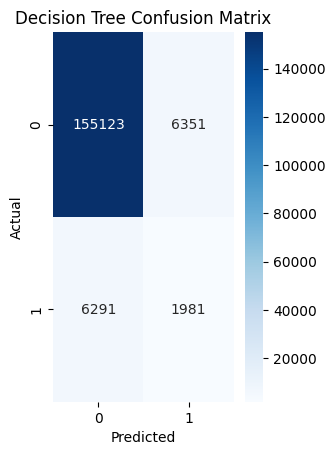

In [16]:
# Decision Tree confusion matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.subplot(1, 2, 1)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(321.26767676767673, 0.5, 'Actual')

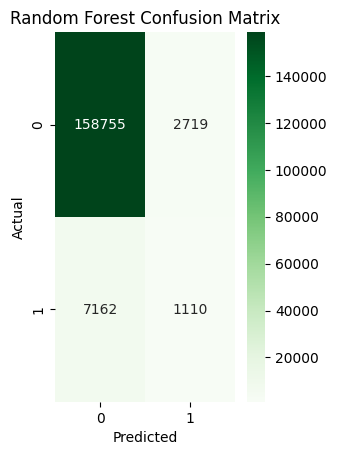

In [14]:
# Random Forest confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [15]:
feature_importance = rf_model.feature_importances_
print(feature_importance)


[4.42280439e-01 9.17214853e-02 8.61042401e-02 1.22493327e-01
 1.83247048e-02 8.31039052e-03 2.99548164e-02 3.07963459e-02
 2.03606646e-02 2.04038631e-03 2.49586592e-03 3.10739427e-03
 3.27797382e-03 3.47937187e-03 4.47556761e-03 5.37724108e-03
 6.50819242e-03 7.76588033e-03 1.07227475e-02 1.23595267e-02
 1.75715221e-02 0.00000000e+00 0.00000000e+00 8.01774430e-08
 1.77177348e-10 0.00000000e+00 8.96788192e-10 2.18619169e-05
 1.83190319e-07 3.61407124e-10 4.03863537e-05 5.50478400e-05
 8.49492622e-06 0.00000000e+00 1.90519986e-02 1.68967059e-02
 1.02806354e-02 1.72399424e-02 6.87657865e-03]
